In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
factura_final2 = pd.read_csv("factura_final2.csv")
factura_final2

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,Margen_Producto,%_Margen_Producto
0,1119,Fruta al peso,1.11,1.05,1,0.95,2015-08-16,1.05,0.00,7.0,0.95,1.00
1,1035,Cerveza 33cl SKOL,6.00,3.00,2,0.50,2015-08-16,3.00,0.28,10.0,0.22,0.44
2,1031,"Cerveza sin 0,0 33cl SAN MIGUEL",1.00,0.70,3,0.70,2015-08-20,1.90,0.40,10.0,0.30,0.43
3,1060,"Agua 1,5L BEZOYA",1.00,0.70,3,0.70,2015-08-20,1.90,0.36,10.0,0.34,0.49
4,421,Tomate frito 265gr brick ORLANDO,1.00,0.50,3,0.50,2015-08-20,1.90,0.30,7.0,0.20,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...
1242430,7164,Donettes clasicos,1.00,1.99,467110,1.99,2022-11-01,7.84,1.27,7.0,0.72,0.36
1242431,1078,Chuches 0.05,2.00,0.10,467111,0.05,2022-11-01,0.10,0.04,7.0,0.01,0.20
1242432,1118,Producto de Oferta,1.00,1.00,467112,1.00,2022-11-01,4.45,0.80,7.0,0.20,0.20
1242433,8689,Palmera bollo,1.00,1.25,467112,1.25,2022-11-01,4.45,0.00,7.0,1.25,1.00


<AxesSubplot:xlabel='%_Margen_Producto', ylabel='Count'>

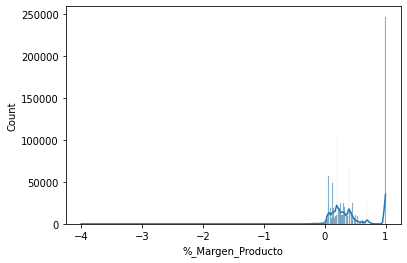

In [4]:
sns.histplot(data = factura_final2["%_Margen_Producto"], kde=True)

<AxesSubplot:xlabel='Precio', ylabel='Count'>

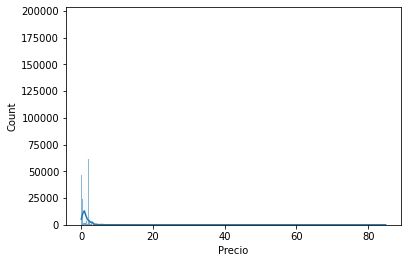

In [5]:
sns.histplot(data = factura_final2["Precio"], kde=True)

<AxesSubplot:xlabel='Coste', ylabel='Count'>

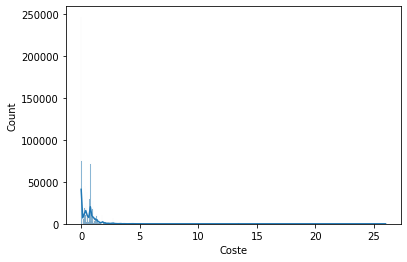

In [6]:
sns.histplot(data = factura_final2["Coste"], kde=True)

In [7]:
# Esto nos dice que debemos imputar la mediana ya que hay outliers y tendra mas fiabilidad en los resultados

Sacamos los valores que queremos imputar en la tabla

In [8]:
# Como podemos ver, no se puede imputar ni la mediana general ni la media general (del coste ni del margen), ya que hay
# productos que quedarian muy descuadrados, por lo que decido hacer mediana y media del margen porcentual.

media_coste = factura_final2.query("Coste!=0").Coste.mean()
print(media_coste)
mediana_coste = factura_final2.query("Coste!=0").Coste.median()
print(mediana_coste)
media_margen = factura_final2.query("Coste!=0").Margen_Producto.mean()
print(media_margen)
mediana_margen = factura_final2.query("Coste!=0").Margen_Producto.median()
print(mediana_margen)

0.8156924404130036
0.74
0.29052743467349046
0.2199999999999999


In [9]:
# Ya que los registros con coste 0 son muy variados, he preferido calcular la mediana y media, tanto del margen 
# comercial como del porcentual (todo ello respecto a la seccion). Vemos que el margen comercial es demasiado elevado
# en ciertos productos, por lo que elegimos el margen comercial. 
# Entre media y mediana tenemos que valorar bien cual elegimos, por lo que de momento comprobamos ambas. 

mediana_porcentual1 = factura_final2.groupby("Seccion")["%_Margen_Producto"].median()
print(mediana_porcentual1)
media_porcentual1 = factura_final2.groupby("Seccion")["%_Margen_Producto"].mean()
print(media_porcentual1)
mediana_comercial1 = factura_final2.groupby("Seccion")["Margen_Producto"].median()
print(mediana_comercial1)
media_comercial1 = factura_final2.groupby("Seccion")["Margen_Producto"].mean()
print(media_comercial1)

Seccion
1.0     0.32
2.0     0.46
3.0     0.40
4.0     0.28
5.0     0.40
6.0     0.20
7.0     0.30
8.0     0.13
9.0     0.30
10.0    0.40
Name: %_Margen_Producto, dtype: float64
Seccion
1.0     0.380266
2.0     0.445762
3.0     0.462642
4.0     0.326224
5.0     0.446585
6.0     0.097311
7.0     0.470472
8.0     0.268389
9.0     0.340130
10.0    0.393544
Name: %_Margen_Producto, dtype: float64
Seccion
1.0     0.43
2.0     0.60
3.0     0.07
4.0     0.50
5.0     0.07
6.0     0.20
7.0     0.32
8.0     0.05
9.0     0.30
10.0    0.36
Name: Margen_Producto, dtype: float64
Seccion
1.0     0.742905
2.0     1.066938
3.0     0.235614
4.0     0.968673
5.0     0.234502
6.0     0.165770
7.0     1.199012
8.0     0.227119
9.0     0.532708
10.0    0.402293
Name: Margen_Producto, dtype: float64


In [10]:
mediana_porcentual = factura_final2.query("Coste!=0").groupby("Seccion")["%_Margen_Producto"].median()
print(mediana_porcentual)
media_porcentual = factura_final2.query("Coste!=0").groupby("Seccion")["%_Margen_Producto"].mean()
print(media_porcentual)
mediana_comercial = factura_final2.query("Coste!=0").groupby("Seccion")["Margen_Producto"].median()
print(mediana_comercial)
media_comercial = factura_final2.query("Coste!=0").groupby("Seccion")["Margen_Producto"].mean()
print(media_comercial)

Seccion
1.0     0.31
2.0     0.32
3.0     0.40
4.0     0.27
5.0     0.40
6.0     0.20
7.0     0.20
8.0     0.07
9.0     0.30
10.0    0.40
Name: %_Margen_Producto, dtype: float64
Seccion
1.0     0.306518
2.0     0.313965
3.0     0.456380
4.0     0.285128
5.0     0.431654
6.0     0.086269
7.0     0.232178
8.0     0.091302
9.0     0.278471
10.0    0.389320
Name: %_Margen_Producto, dtype: float64
Seccion
1.0     0.40
2.0     0.60
3.0     0.07
4.0     0.50
5.0     0.07
6.0     0.20
7.0     0.20
8.0     0.05
9.0     0.30
10.0    0.35
Name: Margen_Producto, dtype: float64
Seccion
1.0     0.675867
2.0     0.618256
3.0     0.218658
4.0     0.653622
5.0     0.202806
6.0     0.155566
7.0     0.266615
8.0     0.043566
9.0     0.406394
10.0    0.394756
Name: Margen_Producto, dtype: float64


Imputacion con mediana porcentual

In [12]:
for i in factura_final2.query("Coste==0")["Seccion"]:
    factura_final2.loc[factura_final2["Coste"] <= 0.01, "%_Margen_Producto"] = mediana_porcentual[i]
    factura_final2["Coste"] = factura_final2["Precio_Unit"].values - factura_final2["Precio_Unit"].values * factura_final2["%_Margen_Producto"].values
    factura_final2["Margen_Producto"] = factura_final2["Precio_Unit"].values - factura_final2["Coste"].values
factura_final2

,Codigo,Producto,Unidades,Precio,Num_Factura,Precio_Unit,Fecha,Total,Coste,Seccion,Margen_Producto,%_Margen_Producto
0,1119,Fruta al peso,1.11,1.05,1,0.95,2015-08-16,1.05,0.7600,7.0,0.1900,0.20
1,1035,Cerveza 33cl SKOL,6.00,3.00,2,0.50,2015-08-16,3.00,0.2800,10.0,0.2200,0.44
2,1031,"Cerveza sin 0,0 33cl SAN MIGUEL",1.00,0.70,3,0.70,2015-08-20,1.90,0.3990,10.0,0.3010,0.43
3,1060,"Agua 1,5L BEZOYA",1.00,0.70,3,0.70,2015-08-20,1.90,0.3570,10.0,0.3430,0.49
4,421,Tomate frito 265gr brick ORLANDO,1.00,0.50,3,0.50,2015-08-20,1.90,0.3000,7.0,0.2000,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...
1242430,7164,Donettes clasicos,1.00,1.99,467110,1.99,2022-11-01,7.84,1.2736,7.0,0.7164,0.36
1242431,1078,Chuches 0.05,2.00,0.10,467111,0.05,2022-11-01,0.10,0.0400,7.0,0.0100,0.20
1242432,1118,Producto de Oferta,1.00,1.00,467112,1.00,2022-11-01,4.45,0.8000,7.0,0.2000,0.20
1242433,8689,Palmera bollo,1.00,1.25,467112,1.25,2022-11-01,4.45,1.0000,7.0,0.2500,0.20


In [ ]:
factura_final2.describe().round(3)

,Codigo,Unidades,Precio,Num_Factura,Precio_Unit,Total,Coste,Seccion,Margen_Producto,%_Margen_Producto
count,1242435.000,1242435.000,1242435.000,1242435.000,1242435.000,1242435.000,1242435.000,1242435.000,1242435.000,1242435.000
mean,3039.949,1.401,1.387,236306.031,1.468,6.714,1.119,7.042,0.349,0.266
std,2638.484,2.086,1.353,132963.213,1.953,7.781,1.569,2.267,0.444,0.175
min,2.000,0.000,0.000,1.000,0.020,0.010,0.016,1.000,-7.410,-4.000
25%,1070.000,1.000,0.700,122529.500,0.600,2.300,0.399,7.000,0.100,0.200
50%,1148.000,1.000,1.000,241905.000,1.000,4.500,0.800,7.000,0.256,0.200
75%,5764.000,1.000,1.750,348160.000,1.600,8.350,1.215,8.000,0.438,0.380
max,8713.000,233.000,84.880,467112.000,48.000,173.690,38.400,10.000,11.385,0.990


Guardamos el archivo con nombre distinto

In [13]:
factura_final2.to_csv("factura_final_mediana.csv",index=False)